# 確率変数と確率分布

確率モデルを学ぶ上での基礎知識まとめ。

In [1]:
import random
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np


---

## 確率変数

値が確率的に決まる変数。ランダムに値が決まる変数。確率そのものではないので注意。

確率変数の例は以下。

- サイコロを一回振った時に出る目
- 宝くじの当選番号

「確率的」と言われて大体の人が納得すると思う。

大体の人が「まあ確かに」って感じで納得すると思うのだが、ただよく考えてみると、「本当に確率的か？」とも思えてくる。

例えば人間がサイコロを振った時に出る目について考えてみよう。サイコロが人間の手から離れた瞬間、そのサイコロは物理法則に従って動くので、その瞬間から既に出る目が確定していると言える。実際に、その瞬間のサイコロの位置と速度を完璧に把握できれば、計算によって出る目を求めることができるだろう。手から離れた瞬間に出る目が確定するのであれば、サイコロの目は人の投げ方に完全に依存することとなり、果たしてそれは確率的なのか？と思えてくる。

しかし確率モデルにおいて、こういった疑問に答える必要はない。確率モデルとは、ある事象の裏に確率的な過程を仮定し（ギャグ）、それをモデル化する。実際に確率的な事象かどうかについては議論しない。あらゆる事象を「確率的である」と仮定した上で話を進める。ということで、確率モデルにとってはあらゆる変数が確率変数となる。

### 余談

今述べた通り、確率モデルを考える上で扱う事象が本当に確率的かどうかはどうでも良いのだが、何となく面白そうなので敢えて考えてみよう。

サイコロの出る目について、それが人の投げ方に依るという話をした。では、投げる人は出る目をコントロールできるだろうか。ここでの「サイコロを振る」というのは一般的な振り方で、ある程度勢いをつけて転がるような振り方を指す。んで、この振り方で出る目をコントロールできるか（狙った目を出せるか）というと、まあ無理だよね。ということで、意図した操作ができないのであれば、人間にとってそれは確率的と呼んでいいよね、という結論に至る。

またこの考え方はコンピュータで乱数を扱う際にも用いられる。コンピュータは人間が設定したプログラムしか実行できないので、真の意味での乱数というのは生み出せない。だからコンピュータで扱う乱数は正式には「疑似乱数」と呼ばれる。疑似乱数は、<u>理解したところでそれを操作することができない</u>ようなアルゴリズムによって生成されている。

もう一つ、量子力学的に考えてみる。サイコロが手から離れた瞬間、その時の位置と速度が分かれば出る目を予測できるといった。これはサイコロが物理法則に完全に従うという仮定に基づいている。

さて、この世のあらゆる物体は素粒子から成る。この素粒子も物理法則に従うと仮定するなら、この世のあらゆる事象が**確定的**であると言える。今あなたがこれを読むことは宇宙が生まれた138億年前から既に決まっており、あなたが1年後、10年後、100年後にどうなっているかも今この時点で既に確定している、ということになる。この話はラプラスの悪魔として有名。

しかし、ラプラスの悪魔は量子力学によって否定されている。素粒子は物理法則に完全に従わず、確率的に振る舞うことが示されたらしい。どうやら未来は確定していないようので、より良い未来を作るために頑張っていこうね。


---

## 確率分布

確率変数$x$がとりうる値とその確率を表したもの。

確率分布は$p(x)$で表記する。$p(x)$は確率変数$x$が観測される確率（密度）を表し、**確率密度関数**とも呼ばれる。$p(x)$は常に0以上で、また総和が1でないといけない。

$$
p(x) \geq 0, \quad \sum_{x} p(x) = 1
$$

表すものが確率なら$p(x)\leq1$という条件も必要そうに思えるが、これはいらない。厳密には、表しているものは確率ではなく**確率密度**だから。これについては後ほど。

確率分布はパラメータを持つ。パラメータはその分布の詳細な形を決める。確率分布がパラメータ$\theta$に従うことを明示したい場合は以下のように表記する。

- $p(x;\theta)$
- $p(x|\theta)$

パラメータを明示したい場合は上の方がいいかも。下の方は条件付き確率で多く使う。

### 離散型確率分布

確率変数が離散的な場合の確率分布。

例として、サイコロを一回振った時に出る目を確率変数$x$として考える。このとき、$x$が取り得る値とその確率$p(x)$は以下のように表せる。

| $x$ | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
| $p(x)$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ |

棒グラフにするとこう

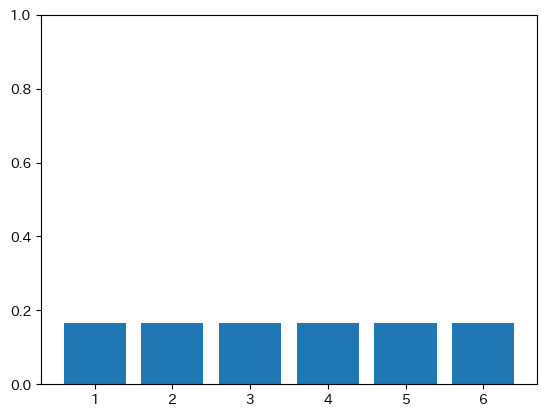

In [2]:
x = [1, 2, 3, 4, 5, 6]
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
plt.bar(x, p)
plt.ylim(0, 1);

数式で表すとこう。

$$
p(x) = \frac{1}{6}
$$

これが$x$の確率分布である。

### 連続型確率分布

確率変数が連続的な場合の確率分布。確率変数が連続的である場合、先ほどのように表として確率をまとめることができない。

そこで、確率変数$x$がある範囲$[a, b]$から得られる確率が、その範囲の積分:

$$
\int_a^b p(x)dx
$$

によって求められるような関数$p(x)$で確率分布を表す。このときに$p(x)$から得られた具体的な値を確率密度と呼ぶ。確率密度は確率の一般化とも言える。よく「確率は面積である」という解釈を見るが、それはここから納得できるかも。

例として、正規分布という連続型確率分布をみてみよう。これは以下の確率密度関数で表される。

$$
p(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

$\mu, \sigma$は正規分布が持つ二つのパラメータ。$\mu, \sigma = 0, 1$として分布のグラフを見てみよう。

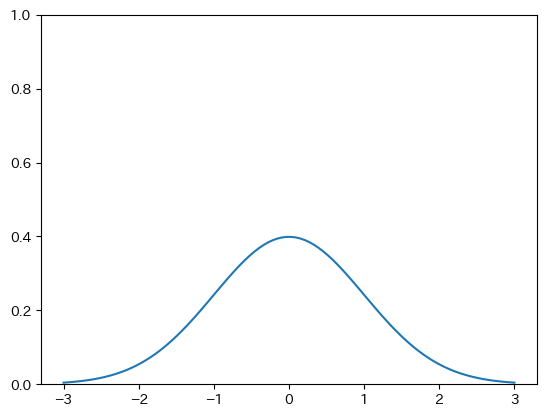

In [3]:
x = np.linspace(-3, 3, 100)
mu, sigma = 0, 1
p = lambda x: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, p(x))
plt.ylim(0, 1);

### 主要な分布

いくつかの主要な分布を紹介する。

#### 一様分布

*Uniform Distribution*, 離散型・連続型

任意の範囲で同じ値を取る分布

$$
p(x) = \frac{1}{b-a} \quad (a \leq x \leq b)
$$

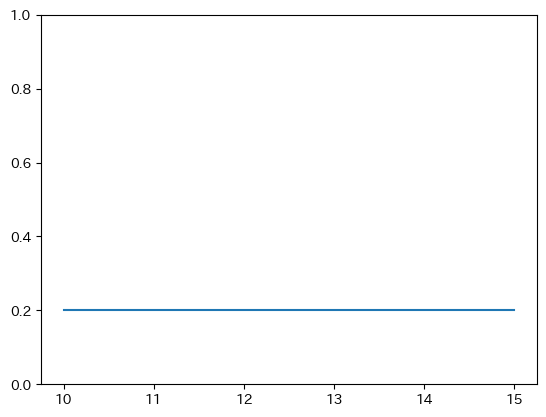

In [4]:
a, b = 10, 15
x = np.linspace(a, b, 100)
p = lambda x: 1 / (b - a) * np.ones_like(x)
plt.plot(x, p(x))
plt.ylim(0, 1);

#### ベルヌーイ分布

*Bernoulli Distribution*, 離散型

二通りの結果があり、片方が確率$\theta$、もう片方が確率$1-\theta$で起こるときの分布。二つの結果を0,1で表すと以下の式で表せる。

$$
p(x;\theta) = \theta^x(1-\theta)^{1-x}
$$

$\theta$が確率。1が起こる確率。

- $p(x=0) = \theta^0(1-\theta)^{1-0} = 1-\theta$
- $p(x=1) = \theta^1(1-\theta)^{1-1} = \theta$

結果が二通りしか得られない様な試行はベルヌーイ試行と呼ばれる。コイン投げなどが例。

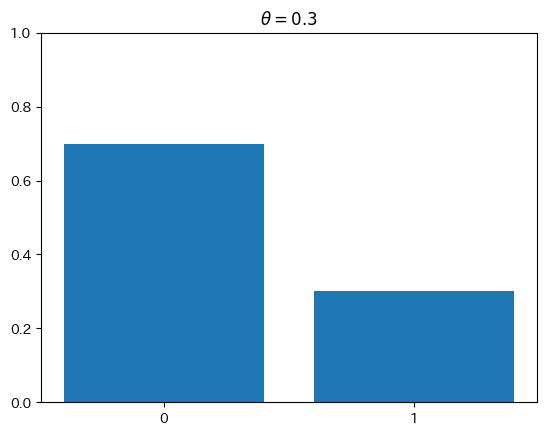

In [5]:
x = np.array([0, 1])
theta = 0.3
p = lambda x: theta**x * (1-theta)**(1-x)
plt.bar(x, p(x))
plt.title(rf'$\theta={theta}$')
plt.xticks(x)
plt.ylim(0, 1);

#### 正規分布

*Normal Distribution*, ガウス分布（*Gaussian Distribution*）とも, 連続型

最も一般的な分布。平均が最も密度が高く、そこから離れるにつれて密度が低くなるという、よく見る分布。平均と分散の2つのパラメータで決まる。

$$
p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

正規分布であることを明示するために以下のように表記することもある。
- $N(x)$
- $\mathcal N(x)$

また平均0, 分散1の正規分布は標準正規分布と呼ぶ。

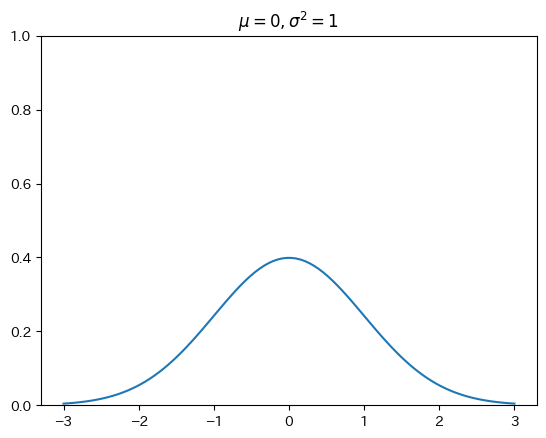

In [6]:
x = np.linspace(-3, 3, 100)
mu, sigma = 0, 1
p = lambda x: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, p(x))
plt.title(rf'$\mu={mu}, \sigma^2={sigma**2}$')
plt.ylim(0, 1);


---

## 期待値

*Expected Value*

確率変数の平均値。確率密度で重みをつけた平均値。加重平均。確率変数$x$の期待値$\mathbb E[x]$は以下。

$$
\mathbb E[x] = \sum_x p(x)x
$$

連続値の場合は積分。確率変数が取り得る全ての値について、その値が出る確率をかけて足し合わせる。

サイコロを一回振った時に出る目を$x$とすると、期待値$\mathbb E[x]$は以下。

$$
\mathbb E[x] = \sum_{i=1}^6 \frac{1}{6} \cdot i = \frac{1}{6} \cdot (1 + 2 + 3 + 4 + 5 + 6) = 3.5
$$

また、分布を明確にするために以下のように表記することもある。

- $\mathbb E_{p(x)}[x]$
- $\mathbb E_{x\sim p(x)}[x]$

$x\sim p(x)$は$x$が分布$p(x)$からサンプリングされていることを意味する。本来とは異なる分布で期待値をとる場面が存在し、区別したい場合などで使う。

### 大数の法則

$n$回の試行によって得られた$n$個の観測値$\{x^{(1)}, x^{(2)}, \cdots, x^{(n)}\}$の平均は、$n$が大きくなればなるほど期待値に近づく。

$$
\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n x^{(i)} = \mathbb E[x]
$$

サイコロの例を実装して確認してみよう。

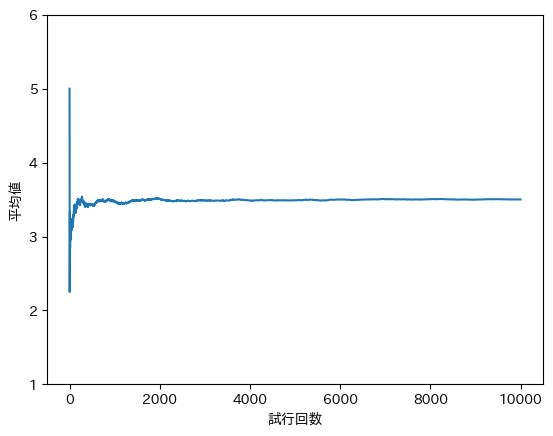

In [7]:
import random

n = 10000
values = [] # 出た目のリスト
expected_values = [] # 期待値のリスト
for _ in range(n):
    value = random.randint(1, 6) # サイコロを振る
    values.append(value) # 出た目をリストに追加
    expected_value = sum(values) / len(values) # 期待値を計算
    expected_values.append(expected_value) # 期待値をリストに追加

plt.plot(expected_values)
plt.xlabel("試行回数")
plt.ylabel("平均値")
plt.ylim(1, 6);

試行回数を重ねるにつれて平均値が期待値3.5に近づいていることが分かる。


---

## 確率分布の推定

確率モデリングの目的の一つは、得られたデータの裏にある確率分布を推定することである。なんらかの手法でデータを集め、そのデータをよく表現する分布をいろいろな手法によって推定する。

初めに述べた通り、確率モデルの世界ではあらゆる変数を確率変数と見做す。つまり、あらゆるデータが確率的に得られると仮定する。

得られたデータの裏にはなんらかの確率分布が存在していると考える。その分布は"真の分布"と表現したりする。確率モデリングは、真の分布に近い分布を推定することが目的となる。推定した分布を含む、データをよく表したモデルを確率モデルと呼ぶ。

また、確率モデルは生成モデルとも見て取れる。最近話題の生成AIも確率モデルの一種であり、特に画像系のモデルは本資料で紹介する手法やモデルと密接な関係がある。

生成したいデータを確率変数と見做し、その分布を推定することで、分布からのサンプリングによるデータの取得=データの生成を可能にする。